## Customer Segmentation / Clustering 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Customers = pd.read_csv("Customers.csv")

In [3]:
Products = pd.read_csv("Products.csv")

In [4]:
Transactions = pd.read_csv("Transactions.csv")

In [5]:
Customers.shape, Products.shape, Transactions.shape

((200, 4), (100, 4), (1000, 7))

In [6]:
Customers.sample(5)

,CustomerID,CustomerName,Region,SignupDate
42,C0043,Sandy Short MD,Asia,2023-02-05
45,C0046,Beth Cardenas,North America,2024-10-23
165,C0166,John Rogers,Europe,2022-02-13
108,C0109,Abigail Jones,North America,2022-05-09
18,C0019,Brandon Rodriguez,Europe,2023-01-12


In [7]:
Products.sample(5)

,ProductID,ProductName,Category,Price
69,P070,HomeSense T-Shirt,Clothing,48.69
45,P046,BookWorld Sweater,Clothing,366.07
31,P032,BookWorld Cookbook,Books,488.63
10,P011,SoundWave Desk Lamp,Home Decor,261.20
92,P093,TechPro Vase,Home Decor,304.94


In [8]:
Transactions.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
481,T00792,C0105,P031,2024-01-11 06:02:11,1,196.40,196.40
320,T00690,C0029,P036,2024-12-26 01:49:16,3,1117.65,372.55
318,T00616,C0101,P036,2024-12-07 12:23:24,2,745.10,372.55
449,T00737,C0157,P021,2024-05-19 06:37:56,1,335.84,335.84
513,T00867,C0171,P032,2024-10-23 16:23:33,3,1465.89,488.63


### Clustering

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [10]:
merged_data = pd.merge(Transactions, Customers, on='CustomerID')

In [13]:
merged_data.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
277,T00531,C0022,P047,2024-07-10 07:04:02,1,159.33,159.33,Teresa Esparza,Asia,2023-10-27
301,T00106,C0158,P076,2024-09-12 09:25:47,4,1717.16,429.29,Wendy Browning,South America,2023-04-12
271,T00047,C0136,P047,2024-04-23 17:09:27,4,637.32,159.33,Kristen Holder,Asia,2024-03-14
556,T00748,C0119,P096,2024-10-13 16:15:16,1,307.47,307.47,David Armstrong,Europe,2023-11-13
925,T00908,C0089,P079,2024-02-12 15:27:25,4,1669.48,417.37,Paul Carter,Europe,2024-04-02


In [14]:
customer_data = merged_data.groupby('CustomerID').agg({'TransactionID': 'count', 'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

In [15]:
customer_data.sample(5)

,CustomerID,TransactionID,TotalValue,Quantity
195,C0197,3,1928.65,9
19,C0020,1,922.41,3
79,C0080,1,1007.52,3
57,C0058,1,396.34,1
146,C0147,9,2948.44,14


In [16]:
customer_data.rename(columns={'TransactionID': 'NumTransactions', 'TotalValue': 'TotalSpending','Quantity': 'TotalQuantity'}, inplace=True)

In [17]:
customer_data.sample(5)

,CustomerID,NumTransactions,TotalSpending,TotalQuantity
79,C0080,1,1007.52,3
0,C0001,5,3354.52,12
60,C0061,3,2138.26,6
18,C0019,6,2185.82,11
159,C0160,5,2926.93,14


In [18]:
features = customer_data[['NumTransactions', 'TotalSpending', 'TotalQuantity']]

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\ARPAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
customer_data.sample(5)

,CustomerID,NumTransactions,TotalSpending,TotalQuantity,Cluster
91,C0092,4,3015.95,10,4
105,C0106,5,2939.30,13,4
149,C0150,1,580.34,2,1
197,C0199,4,1979.28,9,4
189,C0191,5,2997.97,11,4


In [22]:
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')

Davies-Bouldin Index: 0.8967


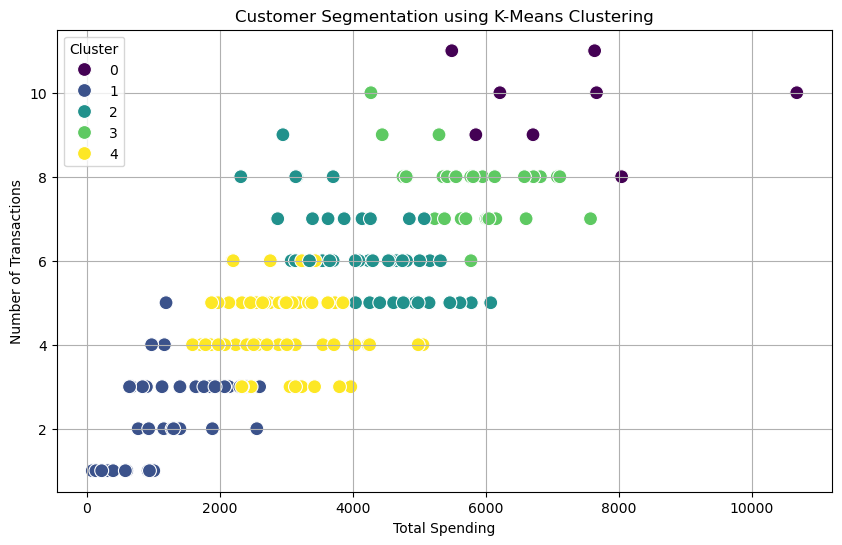

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalSpending', y='NumTransactions', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Total Spending')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
inertia = kmeans.inertia_

In [27]:
silhouette_avg = silhouette_score(scaled_features, customer_data['Cluster'])

In [28]:
print(f'Inertia: {inertia:.4f}')
print(f'Silhouette Score: {silhouette_avg:.4f}')

Inertia: 96.2714
Silhouette Score: 0.3606
